# SIR model

# For the epidemical mathematical model, basic models that are based on compartments, as shown in the following, were used:


## 1.(Susceptible->Infectible) SI model,

## 2.(Susceptible->Infectible-> Susceptible) SIS model,

## 3.(Susceptible->Infectible-> Recovery/Removed) SIR model.

# so we will only be studying about the SIR model 

## In 1927, Kermack and McKendrick first proposed a class of compartmental models that simplified the mathematical modeling of infectious disease transmission. The SIR model is a set of general equations that explain the dynamics of an infectious disease spreading through a susceptible population.

## Susceptible S(t) is used to represent the individuals not yet infected with the disease at time t, or those susceptible to the disease of the population.

## Infected I(t) denotes the individuals of the population who have been infected with the disease and are capable of spreading the disease to those in the susceptible category.

## Recovered R(t) is the compartment used for the individuals of the population who have been infected and then removed from the disease, either due to immunization or due to death. Those in this category are not able to be infected again or to transmit the infection to others

# dS/dt = −(β/N)SI

# dI/dt = (β/N)SI−γI

# dR/dt = γI

# Here, N=S+I+R or N(t) = S(t)+I(t)+R(t) is independent of time t and denotes the total population size 


## importing the required libraries!

In [67]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from scipy.integrate import odeint
import seaborn as sns

## read_csv is an important pandas function to read the csv files and do operations on it. and df.head() returns the 1st 5 rows.

## "linear-comprehensive-covid-data" is the data we are working on

In [2]:
df = pd.read_csv(r"C:\Users\SAMARTH P SHET\linear-comprehensive-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


## We use df.groupby function as groupby operation involves in the combination of splitting a object. So the goal is on the country - SLOVAKIA 

In [3]:
x = df.groupby(df.location)
Slovakia = x.get_group("Slovakia")

## Dataframe of the country Slovakia

In [4]:
Slovakia 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60393,SVK,Europe,Slovakia,06-03-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60394,SVK,Europe,Slovakia,07-03-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60395,SVK,Europe,Slovakia,08-03-2020,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60396,SVK,Europe,Slovakia,09-03-2020,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60397,SVK,Europe,Slovakia,10-03-2020,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,SVK,Europe,Slovakia,10-03-2021,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60763,SVK,Europe,Slovakia,11-03-2021,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60764,SVK,Europe,Slovakia,12-03-2021,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60765,SVK,Europe,Slovakia,13-03-2021,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


### We change the index number starting from 60,393-60,766 to 0-373 for easy understaning and readability.

In [5]:
Slovakia=Slovakia.reset_index()
Slovakia.drop('index', axis=1, inplace=True)
Slovakia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,SVK,Europe,Slovakia,06-03-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
1,SVK,Europe,Slovakia,07-03-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
2,SVK,Europe,Slovakia,08-03-2020,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
3,SVK,Europe,Slovakia,09-03-2020,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
4,SVK,Europe,Slovakia,10-03-2020,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,SVK,Europe,Slovakia,10-03-2021,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
370,SVK,Europe,Slovakia,11-03-2021,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
371,SVK,Europe,Slovakia,12-03-2021,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
372,SVK,Europe,Slovakia,13-03-2021,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [6]:
Slovakia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,SVK,Europe,Slovakia,06-03-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
1,SVK,Europe,Slovakia,07-03-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
2,SVK,Europe,Slovakia,08-03-2020,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
3,SVK,Europe,Slovakia,09-03-2020,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
4,SVK,Europe,Slovakia,10-03-2020,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [7]:
Slovakia.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
369,SVK,Europe,Slovakia,10-03-2021,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
370,SVK,Europe,Slovakia,11-03-2021,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
371,SVK,Europe,Slovakia,12-03-2021,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
372,SVK,Europe,Slovakia,13-03-2021,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
373,SVK,Europe,Slovakia,14-03-2021,337503.0,1268.0,2016.143,8528.0,88.0,98.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [8]:
START_DATE = {'Slovakia':'06/03/2020'}

### As we can see from the dataframe, the covid has started on 06/03/2020 in country Slovakia

### The total population in the country Slovakia is found below. 

In [9]:
N = Slovakia.population[0]
N

5459643.0

### Hence the total population is 5459643. hence N = 5459643

In [10]:
Slovakia.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [11]:
Slovakia.shape

(374, 59)

### Now, we will be finding the mean value of the reproduction rate

In [12]:
mean_r0= Slovakia['reproduction_rate'].mean()
mean_r0

1.1303888888888878

In [13]:
for i in Slovakia['total_cases']:
    if i>0:
        break
i

1.0

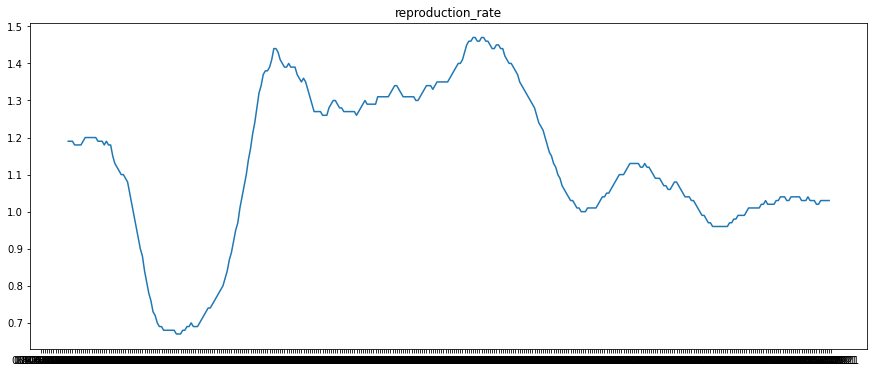

In [23]:
plt.figure(figsize=(15,6))
plt.plot(Slovakia['date'],Slovakia['reproduction_rate'])
plt.title('reproduction_rate')
plt.tick_params(axis='x', rotation=0)

# As per the given condition, we willl be dividing our model into 4 different periods,

## - first period - starting date       ⇒ peak with the initial parameters.

## - second period - starting date ⇒ end of first wave with the initial parameters.

## - third period - peak date ⇒ end of first wave with the peak parameters.

## - fourth period - starting of second-wave ⇒ the last date with the parameters of the starting of the second wave.

## As the conditions mentioned above, we will now find the number of days per each period

## 1. First wave  - starting date is 06-03-2020, the peak value was 114 cases on 18-04-2020.
## 2. First wave - starting date is 06-03-2020, the end of the 1st wave was on 03-06-2020.
## 3. Second wave - starting date is 25-09-2020, the peak value was 6315 cases on 01-01-2021

## So, we can find the number of days from above data. 
## from the starting date till the peak value of 1st wave , the number of days is 43 days
## from the peak value of 1st wave till the end of the 1st wave, there are 89 days.
## the total days for the start and end of the 1st wave is 69days
## the total days from the starting of 2nd wave till 14-03-2021 is 195days 

## Now we need to find the mean value of reproduction [r0]  rate for each period

In [37]:
r0_period1= Slovakia['reproduction_rate'][0:44].mean()
r0_period2= Slovakia['reproduction_rate'][0:90].mean()
r0_period3= Slovakia['reproduction_rate'][43:90].mean()
r0_period4= Slovakia['reproduction_rate'][246:].mean()

print(r0_period1, r0_period2, r0_period3, r0_period4)

1.159032258064516 0.9146753246753248 0.7557446808510639 1.036456692913386


# Defining the differential equation for the SIR model

In [50]:
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

# for period 1

In [51]:
R0 = r0_period1

#t_infectious= 5,t_incubation= 3.3
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial1 = 1/N
r_initial1 = 0.00
s_initial1 = (N-1)/N

gamma = 1/t_infective
beta1 = R0*gamma

In [52]:
t1 = np.linspace(0, 44, 44)  # Grid of time points (in days)
x_initial1 = s_initial1, i_initial1, r_initial1
soln1 = odeint(deriv, x_initial1, t1, args=(beta1, gamma))
s1, i1, r1 = soln1.T
e = None

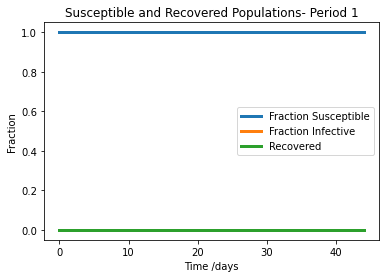

In [53]:
fig= plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.plot(t1, s1, lw=3, label='Fraction Susceptible')
ax1.plot(t1, i1, lw=3, label='Fraction Infective')
ax1.plot(t1, r1, lw=3, label='Recovered')
ax1.set_title('Susceptible and Recovered Populations- Period 1')
ax1.set_xlabel('Time /days')
ax1.set_ylabel('Fraction')
ax1.legend()
plt.show()

# for period 2

In [ ]:
R0 = r0_period2

#t_infectious= 5,t_incubation= 3.3
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial2 = 1/N
r_initial2 = 0.00
s_initial2 = (N-1)/N

gamma = 1/t_infective
beta2 = R0*gamma

In [54]:
t2 = np.linspace(0, 89, 90)  # Grid of time points (in days)
x_initial2 = s_initial2, i_initial2, r_initial2
soln2 = odeint(deriv, x_initial2, t2, args=(beta2, gamma))
s2, i2, r2 = soln2.T
e = None

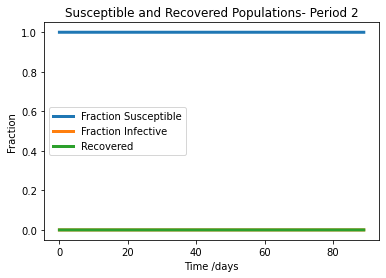

In [83]:
fig= plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.plot(t2, s2, lw=3, label='Fraction Susceptible')
ax2.plot(t2, i2, lw=3, label='Fraction Infective')
ax2.plot(t2, r2, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 2')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Fraction')
ax2.legend(loc='center left')

plt.show()

In [ ]:
## as we can find out the active cases using the formula as Active Cases = Total_Cases - 

In [59]:
Slovakia['total_cases_shifted']= Slovakia.total_cases.shift(14)
Slovakia['active_cases_calc']= Slovakia['total_cases']-Slovakia['total_cases_shifted']
Slovakia['susceptible']= Slovakia['population']-Slovakia['total_cases']

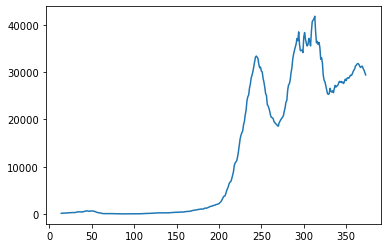

In [70]:
plt.plot(Slovakia['active_cases_calc'])

# for period 3

In [73]:
R0 = r0_period3

#t_infectious= 5,t_incubation= 3.3
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial3= Slovakia.loc[43, 'active_cases_calc']/N
s_initial3= (N-Slovakia.loc[43, 'total_cases'])/N
r_initial3= 1-i_initial3-s_initial3

gamma = 1/t_infective
beta3 = R0*gamma

In [74]:
t3 = np.linspace(0, 69, 69)  # Grid of time points (in days)
x_initial3 = s_initial3, i_initial3, r_initial3
soln3 = odeint(deriv, x_initial3, t3, args=(beta3, gamma))
s3, i3, r3 = soln3.T
e = None

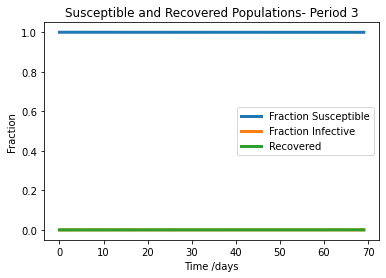

In [80]:
fig= plt.figure()
ax2 = fig.add_subplot(1,1,1)

ax2.plot(t3, s3, lw=3, label='Fraction Susceptible')
ax2.plot(t3, i3, lw=3, label='Fraction Infective')
ax2.plot(t3, r3, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 3')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Fraction')
ax2.legend()
plt.show()

# for period 4

In [77]:
R0 = r0_period4

#t_infectious= 5,t_incubation= 3.3
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial4= Slovakia.loc[246, 'active_cases_calc']/N
s_initial4= (N-Slovakia.loc[246, 'total_cases'])/N
r_initial4= 1-i_initial4-s_initial4

gamma = 1/t_infective
beta4 = R0*gamma

In [78]:
t4 = np.linspace(0, 119, 119)  # Grid of time points (in days)
x_initial4 = s_initial4, i_initial4, r_initial4
soln4 = odeint(deriv, x_initial4, t4, args=(beta4, gamma))
s4, i4, r4 = soln4.T
e = None

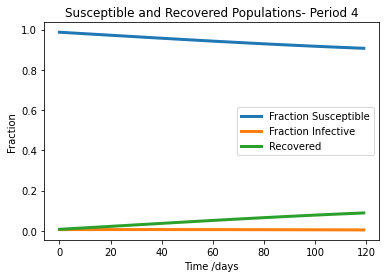

In [82]:
fig= plt.figure()
ax2 = fig.add_subplot(1,1,1)

ax2.plot(t4, s4, lw=3, label='Fraction Susceptible')
ax2.plot(t4, i4, lw=3, label='Fraction Infective')
ax2.plot(t4, r4, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 4')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Fraction')
ax2.legend()
plt.show()